In [7]:
import pandas as pd
hospital_dataset=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
ED=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDVisits")
AV=pd.read_excel("HospitalDatabase.xlsx",sheet_name="AmbulatoryVisits")
RR=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")
Disch=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
Prov=RR=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Providers")
EDU=RR=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")

In [11]:
import pandas as pd
from datetime import datetime, date
 
# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

hospital_dataset['Age'] = hospital_dataset['DateOfBirth'].apply(age)
  
display(hospital_dataset)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [12]:
df = pd.merge(hospital_dataset, RR, on='PatientID')
print(df)


     PatientID   FirstName LastName             DateOfBirth  Gender   Race  \
0            1       Lanni      Sue 1960-01-01 00:00:00.000    Male  White   
1            2         Far    Myers 1985-11-15 02:08:42.090    Male  White   
2            3     Devlin   Michael 1976-04-15 02:52:09.762    Male  White   
3            5       Tann      Bama 1962-05-01 19:12:58.950    Male  White   
4            6   Jerrilyn      Kane 1969-03-30 09:36:56.550    Male  White   
..         ...         ...      ...                     ...     ...    ...   
715        738  Konopelski    Group 1975-11-28 02:34:22.237  Female  White   
716        739     Chandal    Group 1985-04-19 17:45:10.810  Female  White   
717        740       Tiena  Mahomet 1960-07-23 09:04:25.637  Female  White   
718        741      Rogahn    Group 1960-03-14 20:14:13.941  Female  White   
719        742    Ondricka   Hegley 1980-11-26 20:22:21.885  Female  White   

    Language  Age  AdmissionID AdmissionDate           Discharg

In [13]:
print (df.loc[df.PrimaryDiagnosis=='Stroke'].value_counts('Age'))

Age
58    7
47    4
38    4
40    4
42    4
52    4
49    4
61    4
55    3
54    3
57    3
62    3
44    3
48    2
37    2
60    2
41    2
39    2
59    1
36    1
50    1
53    1
51    1
46    1
45    1
63    1
dtype: int64


In [14]:
result = Disch.groupby('PrimaryDiagnosis')['ExpectedMortality'].mean()

print (result)

PrimaryDiagnosis
AMI                   0.235146
Afib                  0.304235
Broken Leg            0.275440
Diabetes              0.286476
Fever                 0.296601
Flu                   0.272976
Heart Failure         0.385678
Hip Fracture          0.373310
Hypertension          0.296555
Kidney Failure        0.247592
Knee Replacement      0.290385
Laceration            0.273022
Migraine              0.567372
Pain                  0.548264
Pneumonia             0.374618
Spinal Cord Injury    0.200279
Stroke                0.442433
Name: ExpectedMortality, dtype: float64


In [15]:
colNames = hospital_dataset.FirstName[hospital_dataset.FirstName.str.contains(pat = 'lau')] 


colNames1=hospital_dataset.LastName[hospital_dataset.LastName.str.contains(pat = 'lau')] 

rs=hospital_dataset
print(colNames,colNames1,rs)

369    Zulauf
382    Zulauf
454    Zulauf
463    Zulauf
818    Zulauf
830    Zulauf
910    Zulauf
Name: FirstName, dtype: object 850    Klausen
906    Klausen
Name: LastName, dtype: object      PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:

In [16]:
import numpy as np
np.percentile(df.Age, [25, 50, 75,100])

array([43., 49., 57., 63.])

In [17]:
df.Age.describe()

count    720.000000
mean      49.530556
std        7.909021
min       35.000000
25%       43.000000
50%       49.000000
75%       57.000000
max       63.000000
Name: Age, dtype: float64

In [18]:
x = list(enumerate(hospital_dataset))
print(x)

[(0, 'PatientID'), (1, 'FirstName'), (2, 'LastName'), (3, 'DateOfBirth'), (4, 'Gender'), (5, 'Race'), (6, 'Language'), (7, 'Age')]


In [19]:
mel_count = (AV['VisitStatus'] == 'Canceled').sum() 
print("There are {num} instances of 'Canceled'. ".format(num=mel_count)) 

There are 60 instances of 'Canceled'. 


In [20]:
display(AV.groupby('PatientMRN')['Pulse'].max())

PatientMRN
4      56.678398
5      59.360770
6      67.425256
7      97.442262
8      71.301478
         ...    
913    77.562854
914    67.397064
915    97.802223
916    99.794604
917    67.455019
Name: Pulse, Length: 273, dtype: float64

C:\Users\sudhe\AppData\Local\Temp\ipykernel_5216\782713086.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ED.corr()


<Axes: >

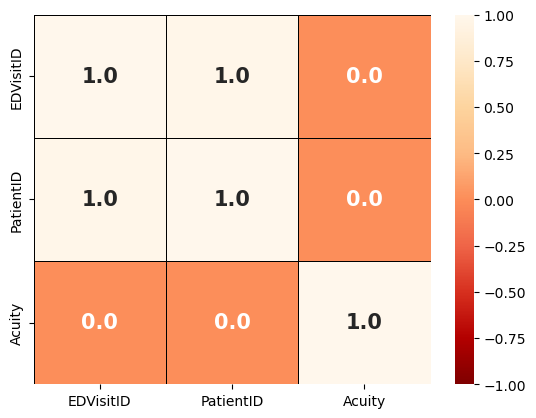

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ED.corr()
           ,vmin=-1
           ,vmax=1
           ,center=0
           ,cmap='OrRd_r'
           ,annot=True
           ,fmt='.1f'
           ,annot_kws=dict(size=15,weight='bold')
           ,linecolor='black'
           ,linewidths=0.5)

<Axes: xlabel='VisitDepartmentID,PatientMRN'>

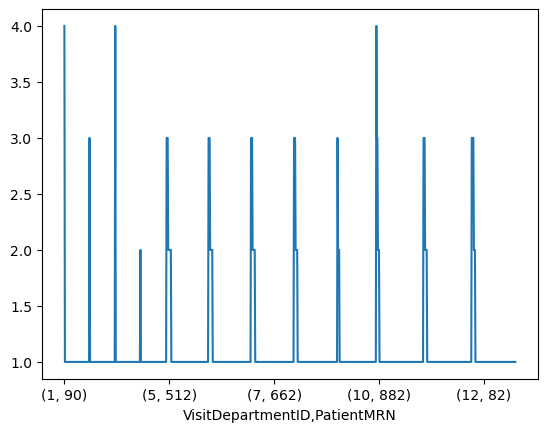

In [27]:
AV.groupby('VisitDepartmentID')['PatientMRN'].value_counts().plot()

In [29]:
display(ED.loc[(ED['ReasonForVisit']=='Migraine') | (ED['ReasonForVisit']=='Pneumonia') & (ED['Acuity']>=2)])

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1162,1124,870,2020-01-14 15:31:20.038,2020-01-15 10:28:29.406,2,Migraine,Discharged
1175,1151,897,2020-01-15 00:24:27.036,2020-01-15 02:11:30.139,1,Migraine,Discharged
1182,1162,908,2020-01-15 03:20:10.313,2020-01-15 05:12:01.600,1,Migraine,Discharged
1184,1164,910,2020-01-15 04:02:21.645,2020-01-15 19:45:03.534,1,Migraine,Discharged


In [32]:
print("Enter reason for visit: ")
limit = str(input())
print (ED.loc[ED.ReasonForVisit==limit].value_counts(ED.PatientID))

Enter reason for visit: 
Migraine
PatientID
12     2
297    2
47     2
2      1
591    1
      ..
247    1
249    1
255    1
257    1
924    1
Length: 153, dtype: int64


In [33]:
bps=AV.loc[AV['BloodPressureSystolic'].idxmax()]
print(bps)

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object


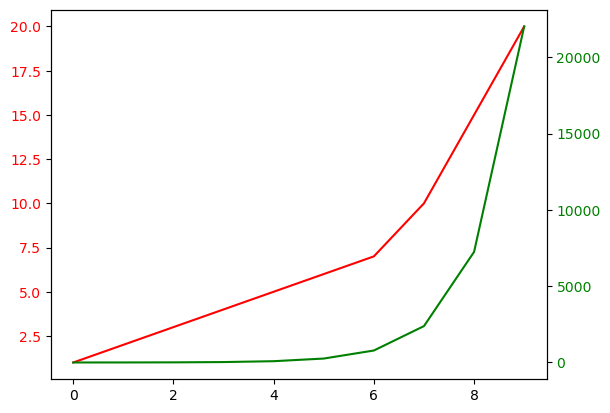

In [34]:
import matplotlib.pyplot as plt
import numpy as np


linear_sequence = [1, 2, 3, 4, 5, 6, 7, 10, 15, 20]
exponential_sequence = np.exp(np.linspace(0, 10, 10))

fig, ax = plt.subplots()


ax.plot(linear_sequence, color='red')
ax.tick_params(axis='y', labelcolor='red')


ax2 = ax.twinx()


ax2.plot(exponential_sequence, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [35]:
bps1=AV.loc[AV['BloodPressureDiastolic'].idxmin()]
print(bps1)

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object


In [36]:
RR['ReadmissionFlag'] = RR['ReadmissionFlag'].fillna(0)
RR.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


In [37]:
hospital_dataset[~hospital_dataset['PatientID'].isin(RR['PatientID'])]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
134,135,Cally,Aylward,1962-01-13 00:11:17.581,Male,Black/African-American,English,61
144,145,Sheena,LLC,1966-10-17 13:24:21.621,Male,Black/African-American,English,56
188,189,Rempel,Group,1974-07-17 04:55:39.964,Male,Black/African-American,English,48
199,200,Fonz,Group,1964-01-15 01:57:57.966,Male,Black/African-American,English,59
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [38]:
rf=ED[ED['Acuity']==5]
print(rf)

      EDVisitID  PatientID               VisitDate         EDDischargeTime  \
7            18         18 2020-01-01 04:39:40.091 2020-01-02 03:25:07.379   
8            19         19 2020-01-01 04:56:11.608 2020-01-02 04:31:45.968   
9            26         26 2020-01-01 06:14:46.240 2020-01-01 15:34:00.868   
10           27         27 2020-01-01 06:27:42.483 2020-01-01 18:30:35.922   
17           45         45 2020-01-01 11:53:16.342 2020-01-01 21:20:18.854   
...         ...        ...                     ...                     ...   
1075        979        725 2020-01-13 01:52:00.052 2020-01-14 01:51:32.779   
1116       1050        796 2020-01-13 21:48:34.838 2020-01-14 10:25:44.839   
1117       1051        797 2020-01-13 22:13:47.779 2020-01-14 06:39:37.586   
1171       1147        893 2020-01-14 23:04:58.584 2020-01-15 09:56:39.625   
1172       1148        894 2020-01-14 23:31:17.382 2020-01-15 07:31:45.241   

      Acuity       ReasonForVisit EDDisposition  
7          5 

In [39]:
hospital_dataset[(hospital_dataset['DateOfBirth']>='1986-01-01') & (hospital_dataset['DateOfBirth']<='1986-12-31')]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
23,24,Gabriel,Joseph,1986-05-31 09:36:05.716,Male,White,Spanish,36
24,25,Lincoln,Brenda,1986-07-24 17:36:00.791,Male,White,Spanish,36
29,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,36
72,74,Lolita,Darci,1986-01-08 02:34:04.596,Female,White,Spanish,37
164,165,Fadel,Bernardt,1986-05-29 00:35:58.694,Male,Black/African-American,English,36
238,239,Bentley,Kippax,1986-02-11 06:22:40.734,Male,Black/African-American,English,37
367,368,Vale,Olanda,1986-04-15 00:49:58.690,Female,White,English,37
373,374,Britt,Dureden,1986-11-19 23:50:47.955,Female,White,English,36
386,387,Cristabel,Chatel,1986-07-10 16:27:30.640,Male,White,English,36
415,416,Constantia,Group,1986-03-26 06:37:22.525,Female,White,English,37


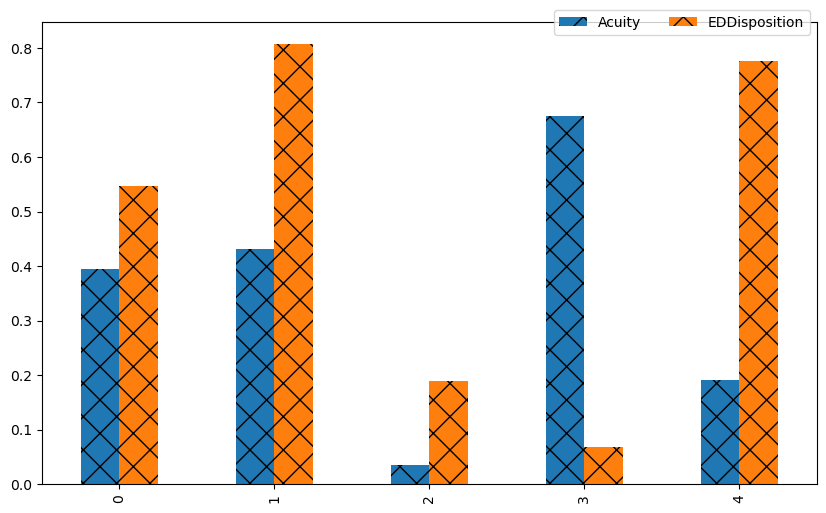

In [40]:
import pandas as pd
ED = pd.DataFrame(np.random.rand(5, 2), columns=['Acuity', 'EDDisposition'])
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
ED.plot(ax=ax, kind='bar', legend=False)

bars = ax.patches
hatches = ''.join(h*len(df) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=4)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_5216\3727318741.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(RR.corr(), vmin=-1, vmax=1, annot=True,  cmap='BrBG')


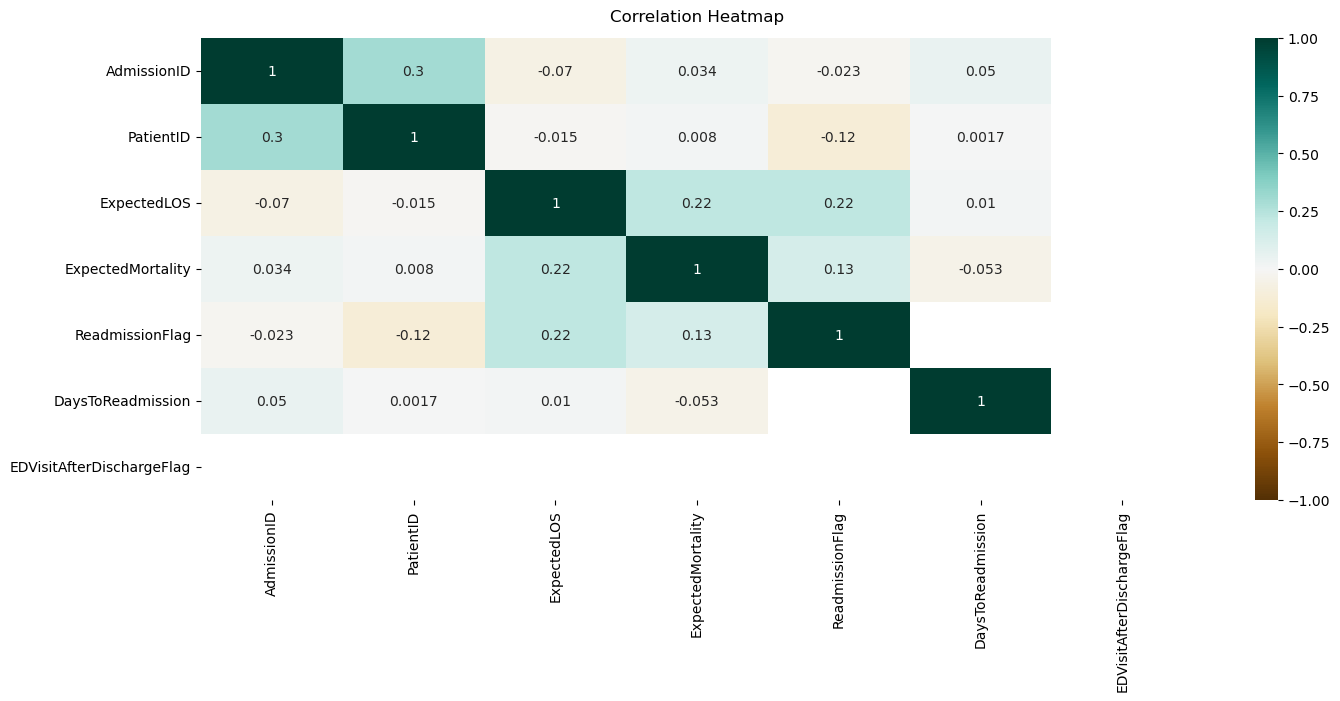

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(RR.corr(), vmin=-1, vmax=1, annot=True,  cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);